# PEC

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cellpy

In [3]:
# C:\scripts\cellpy\dev_data\PEC
raw_file_path = Path('../../../../Eksempelfiler/Test336_2.csv')

In [4]:
raw_file_path.is_file()

True

In [5]:
pec = cellpy.get(instrument="pec_csv", filename=raw_file_path, cycle_mode="cathode", mass=50_000)

c:\users\uleri\documents\programming\cellpy\cellpy\readers\cellreader.py:404: UserWarning: Experimental! Not ready for production!
  warnings.warn("Experimental! Not ready for production!")
c:\users\uleri\documents\programming\cellpy\cellpy\readers\instruments\pec.py:171: UserWarning: raw limits have not been subject for testing yet
  warnings.warn("raw limits have not been subject for testing yet")


In [58]:
import holoviews as hv
hv.extension('bokeh')

ModuleNotFoundError: No module named 'holoviews'

In [6]:
pec.get_cycle_numbers()

array([0, 1, 2, 3, 4], dtype=int64)

In [7]:
steptable = pec.cell.steps
steptable.head(10)

,index,cycle,step,sub_step,point_avr,point_std,point_min,point_max,point_first,point_last,...,ir_std,ir_min,ir_max,ir_first,ir_last,ir_delta,rate_avr,type,sub_type,info
0,0,0,0,1,6.0,3.894440,0,12,0,12,...,0.0,0,0,0,0,0,0.00,rest,None,NaN
1,1,0,13,1,13.0,NaN,13,13,13,13,...,NaN,0,0,0,0,0,0.00,ir,None,NaN
2,2,0,14,1,404.0,225.599572,14,794,14,794,...,0.0,0,0,0,0,0,0.04,charge,None,NaN
3,3,0,15,1,864.5,40.558600,795,934,795,934,...,0.0,0,0,0,0,0,0.03,cv_charge,None,NaN
4,4,0,16,1,963.0,16.598193,935,991,935,991,...,0.0,0,0,0,0,0,0.00,rest,None,NaN
5,5,0,17,1,1596.5,349.441221,992,2201,992,2201,...,0.0,0,0,0,0,0,0.04,discharge,None,NaN
6,6,0,18,1,2231.0,17.175564,2202,2260,2202,2260,...,0.0,0,0,0,0,0,0.00,ocvrlx_up,None,NaN
7,7,1,14,1,2852.0,341.646991,2261,3443,2261,3443,...,0.0,0,0,0,0,0,0.04,charge,None,NaN
8,8,1,15,1,3510.5,38.826537,3444,3577,3444,3577,...,0.0,0,0,0,0,0,0.03,cv_charge,None,NaN
9,9,1,16,1,3607.5,17.464249,3578,3637,3578,3637,...,0.0,0,0,0,0,0,0.00,rest,None,NaN


In [8]:
summary = pec.cell.summary
summary.head(5)

,cycle_index,data_point,test_time,date_time,end_voltage_charge_u_V,end_voltage_discharge_u_V,charge_capacity,discharge_capacity,discharge_capacity_u_mAh_g,charge_capacity_u_mAh_g,...,low_level_u_percentage,high_level_u_percentage,cumulated_ric_u_none,cumulated_ric_sei_u_none,cumulated_ric_disconnect_u_none,shifted_charge_capacity_u_mAh_g,shifted_discharge_capacity_u_mAh_g,normalized_cycle_index,charge_c_rate,discharge_c_rate
0,1,4900,76945.32,2019-10-23 09:13:46,3.800010,2.499992,43.837145,43.849189,876.98378,876.74290,...,NaN,NaN,NaN,NaN,NaN,-0.24088,876.50202,0.244969,0.04,0.04
1,2,7544,118404.78,2019-10-23 20:44:46,3.800055,2.549616,43.873854,43.881977,877.63954,877.47708,...,NaN,NaN,-0.001022,0.000562,-0.000748,-0.40334,877.07374,0.490142,0.04,0.04
2,3,10176,159868.92,2019-10-24 08:15:50,3.800004,2.499948,43.884451,43.892165,877.84330,877.68902,...,NaN,NaN,-0.001440,0.000619,-0.000980,-0.55762,877.13140,0.735376,0.04,0.04
3,4,11676,182747.76,2019-10-24 14:37:09,3.799988,3.291897,43.882177,4.601006,92.02012,877.64354,...,NaN,NaN,0.893559,0.000391,0.894195,785.06580,1662.70934,0.980596,0.04,0.04


In [9]:
c, v = pec.get_dcap(3)


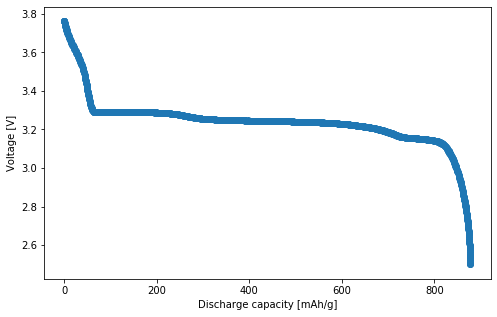

In [11]:
fig = plt.figure(figsize=(8, 5))
curve1 = plt.scatter(c, v) #hv.Scatter((c,v))
plt.xlabel('Discharge capacity [mAh/g]')
plt.ylabel('Voltage [V]')
plt.show()
#curve1

In [12]:
from cellpy import log
log.setup_logging(default_level="DEBUG")

In [13]:
from cellpy.utils import ica

In [14]:
dv1, dq1 = ica.dqdv(
    v, c,
)

2020-06-18 12:48 - root - DEBUG (dqdv): dqdv - starting
2020-06-18 12:48 - root - DEBUG (dqdv): dqdv - created Converter obj
2020-06-18 12:48 - root - DEBUG (dqdv): converter.pre_smoothing: True
2020-06-18 12:48 - root - DEBUG (dqdv): converter.post_smoothing: True
2020-06-18 12:48 - root - DEBUG (dqdv): converter.smoothing: False
2020-06-18 12:48 - root - DEBUG (dqdv): converter.normalise: True
2020-06-18 12:48 - root - DEBUG (dqdv): converter.voltage_fwhm: 0.01
2020-06-18 12:48 - root - DEBUG (set_data): setting data (capacity and voltage)
2020-06-18 12:48 - root - DEBUG (inspect_data): inspecting the data
2020-06-18 12:48 - root - DEBUG (pre_process_data): pre-processing the data
2020-06-18 12:48 - root - DEBUG (pre_process_data):  - interpolating voltage(capacity)
2020-06-18 12:48 - root - DEBUG (pre_process_data):  - pre-smoothing (savgol filter window)
2020-06-18 12:48 - root - DEBUG (increment_data): incrementing data
2020-06-18 12:48 - root - DEBUG (increment_data):  - interpol

2020-06-18 12:50 - root - DEBUG (set_data): setting data (capacity and voltage)
2020-06-18 12:50 - root - DEBUG (inspect_data): inspecting the data
2020-06-18 12:50 - root - DEBUG (pre_process_data): pre-processing the data
2020-06-18 12:50 - root - DEBUG (pre_process_data):  - interpolating voltage(capacity)
2020-06-18 12:50 - root - DEBUG (increment_data): incrementing data
2020-06-18 12:50 - root - DEBUG (increment_data):  - interpolating capacity(voltage)
2020-06-18 12:50 - root - DEBUG (increment_data):  - diff using DIFF
2020-06-18 12:50 - root - DEBUG (post_process_data): post-processing data
2020-06-18 12:50 - root - DEBUG (post_process_data):  - normalizing


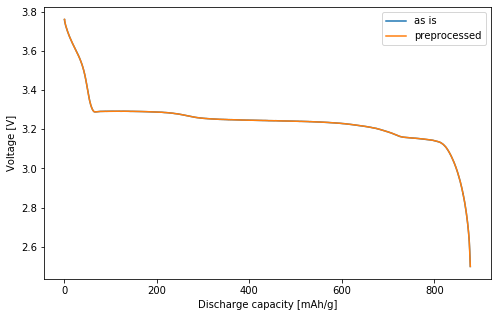

In [18]:
converter = ica.Converter()
converter.pre_smoothing = False
converter.post_smoothing = False
converter.smoothing = False
converter.normalise = True
converter.voltage_fwhm = 0.01
converter.max_points = 400
converter.capacity_resolution = 5.0
converter.voltage_resolution = 0.01
converter.set_data(c, v)
converter.inspect_data()
converter.pre_process_data()
converter.increment_data()
converter.post_process_data()

fig = plt.figure(figsize=(8, 5))
curve00 = plt.plot(c, v, label="as is")
curve01 = plt.plot(converter.capacity_preprocessed, converter.voltage_preprocessed, label="preprocessed")
plt.xlabel('Discharge capacity [mAh/g]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.show()

#curve00 = hv.Scatter((c, v), label="as is").opts(width=800, height=500)
#curve01 = hv.Scatter((converter.capacity_preprocessed, converter.voltage_preprocessed), label="preprocessed").opts(width=800, height=500)
#curve00 * curve01

125
125


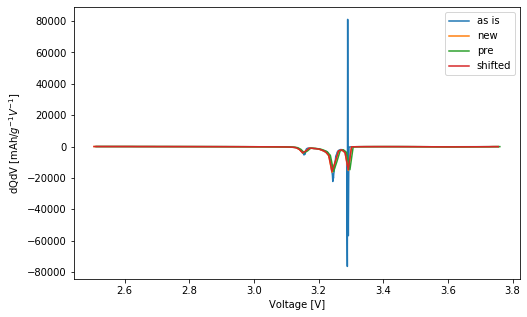

In [27]:
print(len(converter._voltage_processed))
print(len(converter._incremental_capacity))
fig = plt.figure(figsize=(8, 5))
curve1 = plt.plot(dv1, dq1, label='as is', )
curve2 = plt.plot(converter.voltage_processed, converter.incremental_capacity, label="new")
curve3 = plt.plot(converter._voltage_processed, converter._incremental_capacity, label="pre")
curve4 = plt.plot(converter.voltage_processed, converter._incremental_capacity, label="shifted")
plt.xlabel('Voltage [V]')
plt.ylabel('dQdV [mAh/$g^{-1}V^{-1}$]')
plt.legend()
plt.show()

#curve1 = hv.Curve((dv1, dq1), label="as is").opts(width=800, height=500)
#curve2 = hv.Curve((converter.voltage_processed, converter.incremental_capacity), label="new").opts(width=800, height=500)
#curve3 = hv.Curve((converter._voltage_processed, converter._incremental_capacity), label="pre").opts(width=800, height=500)
#curve4 = hv.Curve((converter.voltage_processed, converter._incremental_capacity), label="shifted").opts(width=800, height=500)
#curve1 * curve2 * curve3 * curve4

2020-06-18 13:08 - root - DEBUG (dqdv): dqdv - starting
2020-06-18 13:08 - root - DEBUG (dqdv): dqdv - created Converter obj
2020-06-18 13:08 - root - DEBUG (dqdv): converter.pre_smoothing: True
2020-06-18 13:08 - root - DEBUG (dqdv): converter.post_smoothing: True
2020-06-18 13:08 - root - DEBUG (dqdv): converter.smoothing: False
2020-06-18 13:08 - root - DEBUG (dqdv): converter.normalise: True
2020-06-18 13:08 - root - DEBUG (dqdv): converter.voltage_fwhm: 0.01
2020-06-18 13:08 - root - DEBUG (set_data): setting data (capacity and voltage)
2020-06-18 13:08 - root - DEBUG (inspect_data): inspecting the data
2020-06-18 13:08 - root - DEBUG (pre_process_data): pre-processing the data
2020-06-18 13:08 - root - DEBUG (pre_process_data):  - interpolating voltage(capacity)
2020-06-18 13:08 - root - DEBUG (pre_process_data):  - pre-smoothing (savgol filter window)
2020-06-18 13:08 - root - DEBUG (increment_data): incrementing data
2020-06-18 13:08 - root - DEBUG (increment_data):  - interpol

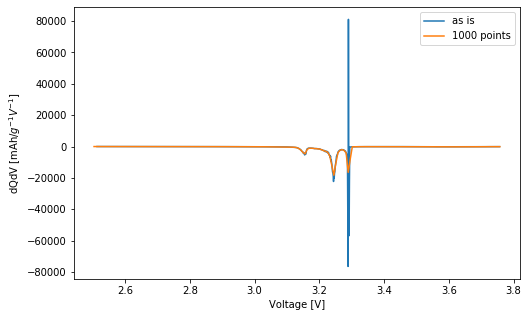

In [29]:

dv1, dq1 = ica.dqdv(
    v, c,
    voltage_fwhm=0.01,
)


dv2, dq2 = ica.dqdv(
    v, c,
    voltage_fwhm=0.01,
    max_points=200,
)

fig = plt.figure(figsize=(8, 5))
curve2 = plt.plot(dv1, dq1, label='as is')
scatter2 = plt.plot(dv2, dq2, label='1000 points')
plt.xlabel('Voltage [V]')
plt.ylabel('dQdV [mAh/$g^{-1}V^{-1}$]')
plt.legend()
plt.show()

#curve2 = hv.Curve((dv1, dq1), label="as is").opts(width=800, height=500)
#scatter2 = hv.Curve((dv2, dq2), label="1000 points").opts(width=800, height=500)
#curve2 * scatter2

In [30]:
?ica.dqdv

Signature:
ica.dqdv(
    voltage,
    capacity,
    voltage_resolution=None,
    capacity_resolution=None,
    voltage_fwhm=0.01,
    pre_smoothing=True,
    diff_smoothing=False,
    post_smoothing=True,
    post_normalization=True,
    interpolation_method=None,
    gaussian_order=None,
    gaussian_mode=None,
    gaussian_cval=None,
    gaussian_truncate=None,
    points_pr_split=None,
    savgol_filter_window_divisor_default=None,
    savgol_filter_window_order=None,
    max_points=None,
    **kwargs,
)
Docstring:
Convenience functions for creating dq-dv data from given capacity
and voltage data.

Args:
    voltage: nd.array or pd.Series
    capacity: nd.array or pd.Series
    voltage_resolution: used for interpolating voltage data (e.g. 0.005)
    capacity_resolution: used for interpolating capacity data
    voltage_fwhm: used for setting the post-processing gaussian sigma
    pre_smoothing: set to True for pre-smoothing (window)
    diff_smoothing: set to True for smoothing durin